In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def truncated_normal(mean, std, low, high):
    samples = []
    while len(samples) < 1:
        x = np.random.normal(mean, std)
        if low <= x <= high:
            samples.append(x)
    return samples[0]

In [21]:
def p(x):
    return np.exp(np.sin(x))

def q(x, sigma):
    return np.exp(-(x ** 2) / (2 * sigma ** 2)) / np.sqrt(2 * np.pi * sigma ** 2)

In [22]:
# Hyperparameters
sig = 2.3
maxima = 20.90

In [23]:
def rejection_sampling(num_samples, sigma):
    x_samples = []
    M = maxima # Initialize m to a value greater than 20.90.
    while len(x_samples) < num_samples:
        z = truncated_normal(0, sigma, -np.pi, np.pi)
        u = np.random.uniform(0, M * q(z, sigma))
        if u <= p(z):
            x_samples.append(z)
    return x_samples

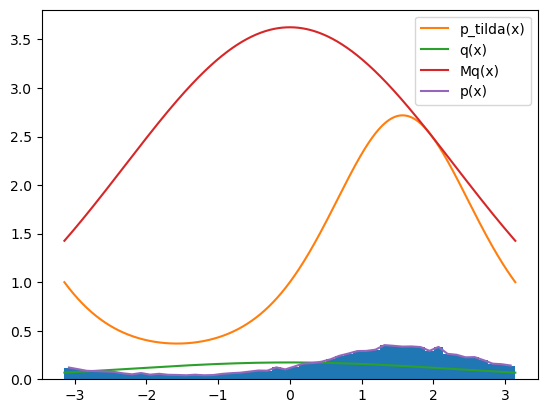

In [24]:
# Generate 10,000 samples using Rejection Sampling
samples = rejection_sampling(10000, sig)
# print(samples)
# Plot histogram of samples
plt.hist(samples, bins=50, density=True)
x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, p(x), label='p_tilda(x)')
plt.plot(x, q(x, sig), label = 'q(x)')
plt.plot(x, maxima * q(x, sig), label='Mq(x)')

hist, bins = np.histogram(samples, bins=50, density=True)
x1 = (bins[:-1] + bins[1:]) / 2
pdf = hist
plt.plot(x1, pdf, label = 'p(x)')

plt.legend()
plt.show()
